<a href="https://colab.research.google.com/github/WNikolassss/ML-Labs/blob/master/lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мединський Микола КП-01МП 13.06.2021

Load the Data

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Analyze the Data

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Which shape has the training data and test data? train_X and train_Y has training data and test_X and test_Y has test data.
Which training and testing samples has each dimension? test_X and train_X

In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

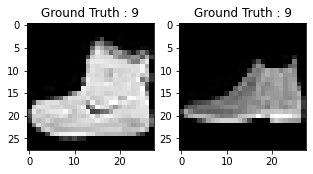

In [4]:
plt.figure(figsize=[5,5])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Data Preprocessing

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
train_Y_one_hot, test_size=0.2, random_state=13)
# For one last time let's check the shape of training and validation set.
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Model the Data

In [9]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

Neural Network Architecture

In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,
3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

Compile the Model

In [11]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [12]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Train the Model

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,
valid_label))

Epoch 1/20
750/750 [==============================] - 104s 119ms/step - loss: 0.6659 - accuracy: 0.7565 - val_loss: 0.3101 - val_accuracy: 0.8892
Epoch 2/20
750/750 [==============================] - 88s 118ms/step - loss: 0.2907 - accuracy: 0.8926 - val_loss: 0.2860 - val_accuracy: 0.8954
Epoch 3/20
750/750 [==============================] - 92s 123ms/step - loss: 0.2446 - accuracy: 0.9097 - val_loss: 0.2501 - val_accuracy: 0.9093
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2072 - accuracy: 0.9248 - val_loss: 0.2498 - val_accuracy: 0.9092
Epoch 5/20
750/750 [==============================] - 90s 120ms/step - loss: 0.1772 - accuracy: 0.9346 - val_loss: 0.2324 - val_accuracy: 0.9152
Epoch 6/20
750/750 [==============================] - 89s 118ms/step - loss: 0.1575 - accuracy: 0.9438 - val_loss: 0.2393 - val_accuracy: 0.9159
Epoch 7/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1359 - accuracy: 0.9491 - val_loss: 0.2553 - val_a

Model Evaluation on the Test Set

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48396846652030945
Test accuracy: 0.9158999919891357


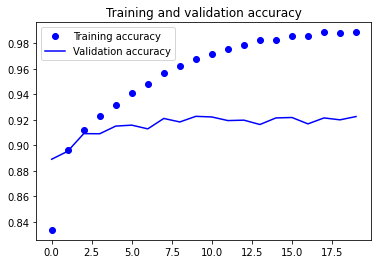

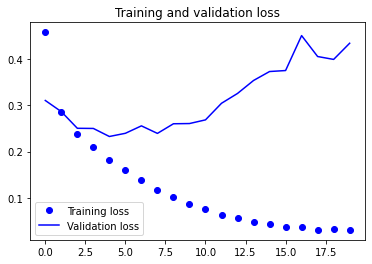

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding Dropout into the Network

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,
3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,
valid_label))

Epoch 1/20
750/750 [==============================] - 97s 127ms/step - loss: 0.8567 - accuracy: 0.6790 - val_loss: 0.3672 - val_accuracy: 0.8662
Epoch 2/20
750/750 [==============================] - 96s 127ms/step - loss: 0.4002 - accuracy: 0.8532 - val_loss: 0.3134 - val_accuracy: 0.8837
Epoch 3/20
750/750 [==============================] - 99s 132ms/step - loss: 0.3395 - accuracy: 0.8745 - val_loss: 0.3062 - val_accuracy: 0.8877
Epoch 4/20
750/750 [==============================] - 96s 129ms/step - loss: 0.3071 - accuracy: 0.8855 - val_loss: 0.2655 - val_accuracy: 0.9007
Epoch 5/20
750/750 [==============================] - 95s 127ms/step - loss: 0.2884 - accuracy: 0.8918 - val_loss: 0.2484 - val_accuracy: 0.9094
Epoch 6/20
750/750 [==============================] - 96s 128ms/step - loss: 0.2694 - accuracy: 0.8989 - val_loss: 0.2414 - val_accuracy: 0.9112
Epoch 7/20
750/750 [==============================] - 96s 128ms/step - loss: 0.2598 - accuracy: 0.9028 - val_loss: 0.2377 - val_ac

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


Model Evaluation on the Test Set (new model)

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.2208 - accuracy: 0.9203


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22078073024749756
Test accuracy: 0.9203000068664551


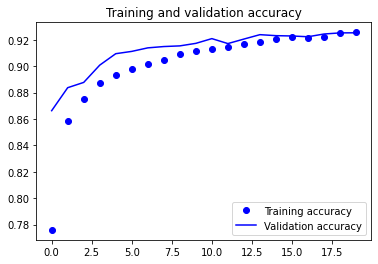

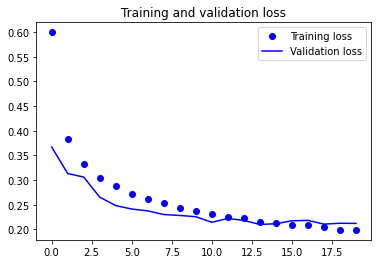

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Predict Labels

In [ ]:
predicted_classes = fashion_model.predict(test_X)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9180 correct labels


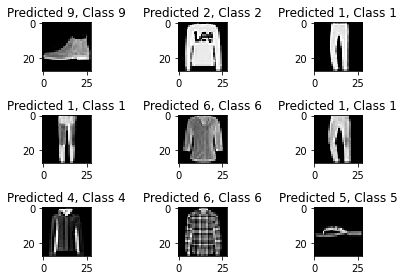

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28), cmap='gray',
interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct],
test_Y[correct]))
  plt.tight_layout()

Found 820 incorrect labels


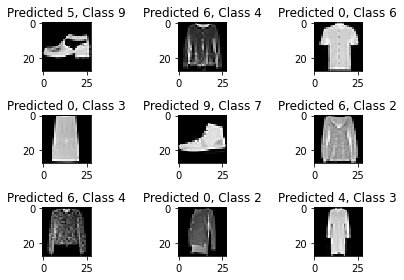

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray',
interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
test_Y[incorrect]))
  plt.tight_layout()

Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes,
target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.88      0.88      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.86      0.89      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.84      0.70      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

